# Santander Customer Transaction Prediction

## Imports

In [1]:
# !pip install lightgbm
# !pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns


import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.tree
import matplotlib.pyplot as plt
import graphviz
from io import StringIO
import time
%matplotlib inline

## Load Data

In [2]:
data = pd.read_csv("train.csv", index_col=0, low_memory=False)
data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


In [3]:
data.shape

(200000, 201)

In [4]:
data.isnull().any().sum()

0

In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
# #read test
# test = pd.read_csv('test.csv')
# test.head()

In [7]:
#test.isnull().any().sum()

# split features from classes

In [8]:
X = data.drop("target", axis=1)
y = data["target"].to_numpy()
print(X.ndim)
print(y.ndim)
print(f"X:{type(X)}")
print(f"y:{type(y)}")

2
1
X:<class 'pandas.core.frame.DataFrame'>
y:<class 'numpy.ndarray'>


<Axes: xlabel='target'>

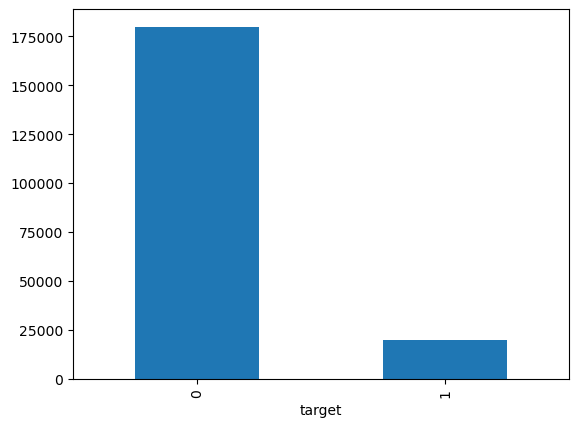

In [9]:
data["target"].value_counts().plot(kind='bar')

In [10]:
X.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
X.dtypes

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 200, dtype: object

In [12]:
#correlation matrix for X, features that are most strongly correlated with each other
correl_with_X = X.corr()

correl_pairs = correl_with_X.unstack()
correl_pairs = correl_pairs[
    correl_pairs.index.get_level_values(0) != correl_pairs.index.get_level_values(1)
]

strongest_correl = correl_pairs.abs().sort_values(ascending=False)

top_10_strongest_correl = strongest_correl.head(10)

print("Top 10 Strongest Correlations Between Features in X:")
print(top_10_strongest_correl)

Top 10 Strongest Correlations Between Features in X:
var_139  var_26     0.009844
var_26   var_139    0.009844
var_53   var_148    0.009788
var_148  var_53     0.009788
var_165  var_81     0.009714
var_81   var_165    0.009714
         var_174    0.009490
var_174  var_81     0.009490
var_189  var_183    0.009359
var_183  var_189    0.009359
dtype: float64


In [13]:
#correlation between X and y

y_series = pd.Series(y, index=X.index)

correlation_with_target = X.corrwith(y_series)

top_10_pos = correlation_with_target.nlargest(10)
top_10_neg = correlation_with_target.nsmallest(10)

print("\nTop 10 Features with Highest Positive Correlation with Y:")
print(top_10_pos)
print("\nTop 10 Features with Highest Negative Correlation with Y:")
print(top_10_neg)


Top 10 Features with Highest Positive Correlation with Y:
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
dtype: float64

Top 10 Features with Highest Negative Correlation with Y:
var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
var_174   -0.061669
var_21    -0.058483
var_166   -0.057773
var_80    -0.057609
var_165   -0.055734
dtype: float64


Train Test Split

In [14]:
#training and test 80% train /20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train_series = pd.Series(y_train, index=X_train.index)

#Take 10% sample of the training data for testing
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # 10% of the training data
y_train_sample = y_train_series.loc[X_train_sample.index]

Models

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()

#rf.fit(X_train, y_train)
rf.fit(X_train_sample, y_train_sample)

y_pred = rf.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Time: 130.26 seconds
Random Forest Classifier:
Accuracy: 0.8976

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



C:\Users\acer9\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer9\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer9\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


lgbm = LGBMClassifier(n_estimators=100, random_state=42)

start_time = time.time()

# lgbm.fit(X_train, y_train)
lgbm.fit(X_train_sample, y_train_sample)

y_pred_lgbm = lgbm.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n LGBM Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1569, number of negative: 14431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.098062 -> initscore=-2.218940
[LightGBM] [Info] Start training from score -2.218940
Training Time: 1.91 seconds

 LGBM Classifier:
 Accuracy: 0.9033

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.80      0.07      0.14      4097

    accuracy                           0.90     40000
   macro avg       0.85      0.54      0.54     40000
weighted avg       0.89      0.90      0.87     40000



In [20]:
#how significant each feature is for making predictions
lgbm.feature_importances_

array([27, 39, 28,  2,  8, 18, 34,  2,  2, 22,  3, 15, 28, 31,  7,  9,  5,
        6, 31,  7, 13, 27, 30,  7, 13,  4, 26,  6, 17,  6,  2,  7, 19, 26,
       25, 13, 18,  2,  5,  3, 36,  5,  8, 18, 29,  8,  5,  3,  6, 24,  4,
       11, 10, 38,  4,  2, 15,  3, 10, 17,  5,  2,  4, 12,  6,  3,  4, 28,
       10, 18, 15, 25,  7,  0,  4, 18, 35,  7, 30,  8, 31, 34, 12, 24,  9,
        5, 23, 28,  9, 14, 11, 26, 21, 14, 21, 10,  2,  7,  1, 37,  9,  3,
        2,  2, 16, 12,  9, 18, 23, 31, 36,  8, 20,  8, 13, 27, 11,  5, 16,
       17, 10, 27, 27, 23,  4, 16,  5, 28,  6,  2,  5, 18, 14, 43,  5, 11,
        3, 10,  7, 31,  4, 10, 14,  8, 13, 13, 33, 10, 19, 34, 23, 10,  7,
        7, 20, 17,  9, 21,  6, 10,  4,  8, 24, 17, 25, 34, 39, 12, 14, 36,
       28, 15, 27, 24, 30, 11,  3, 25,  8, 33, 23,  9,  4,  1, 36,  5,  9,
        7, 19,  4, 31, 26, 17,  8,  3, 20,  6, 16, 34,  7])

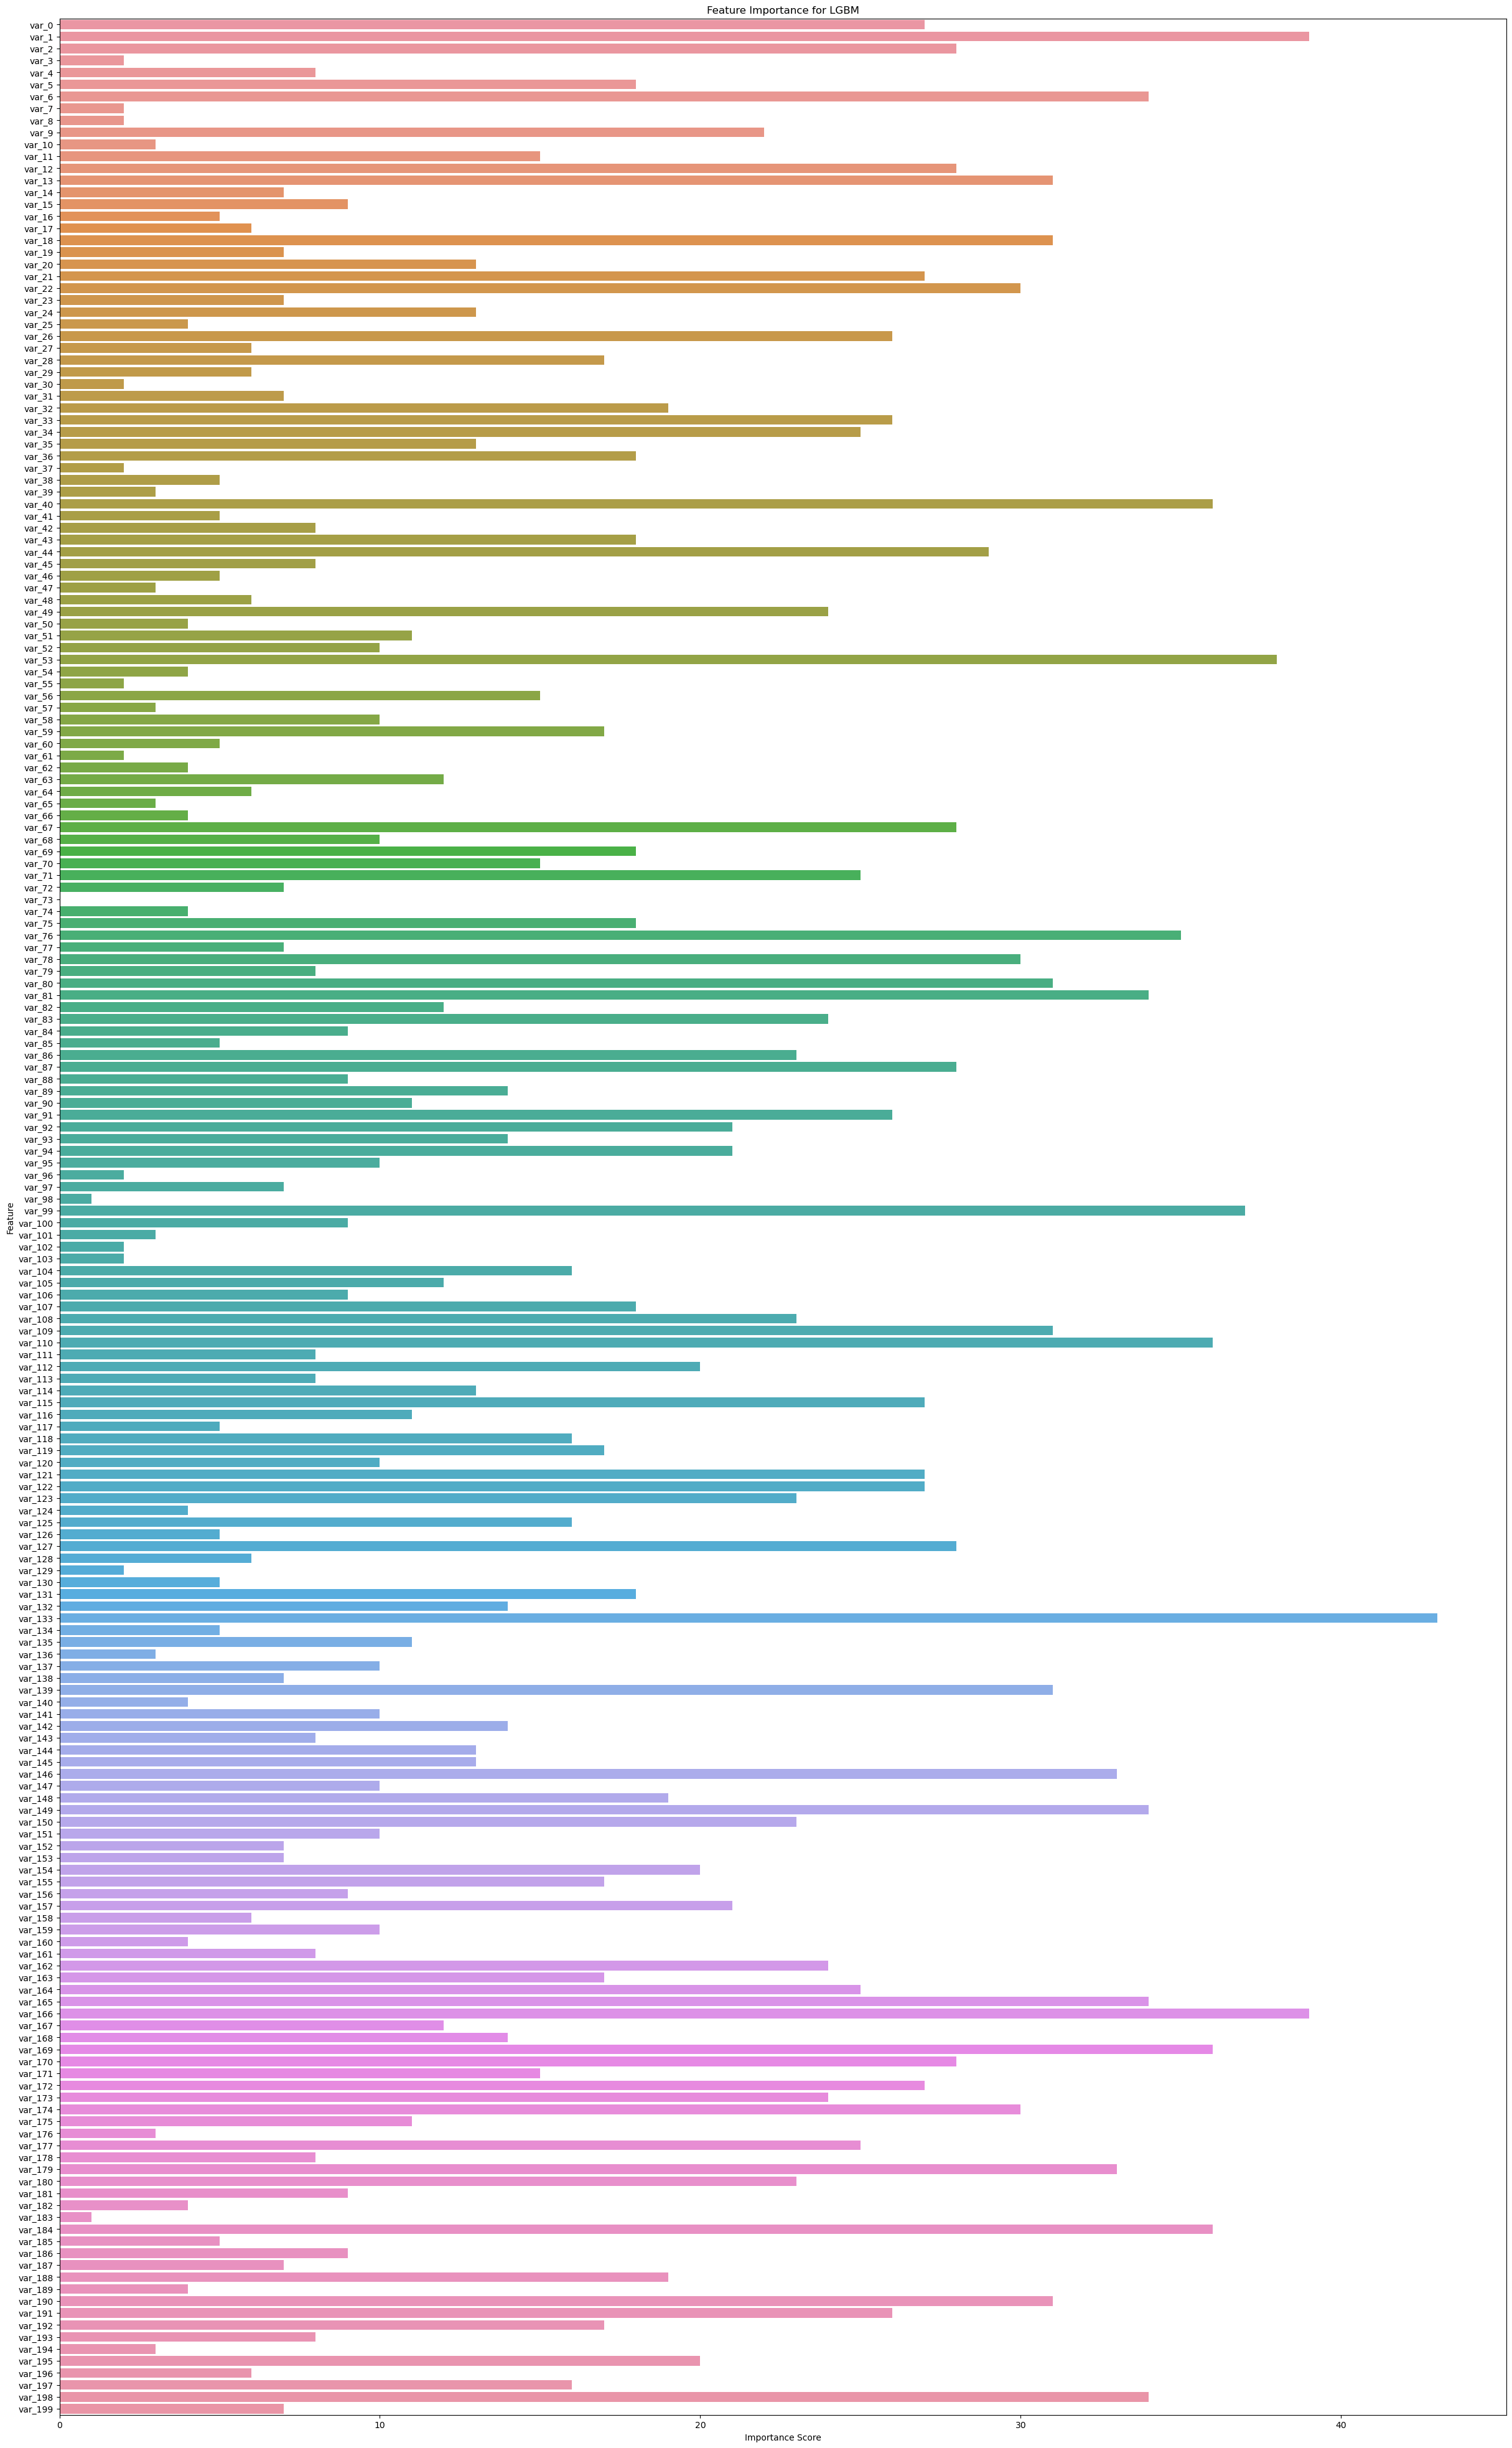

In [23]:
#sort features in descending order to get the most important features at the top
feat_importances = pd.Series(lgbm.feature_importances_, index=X.columns)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for LGBM')

plt.show()

In [24]:
#confusion matrix for lgbm
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
conf_matrix

array([[35826,    77],
       [ 3792,   305]], dtype=int64)

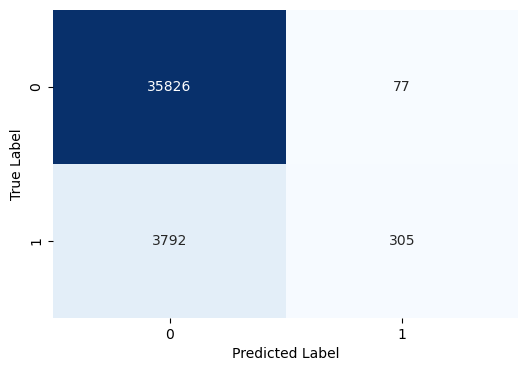

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
#XGboost

xgb= XGBClassifier(n_estimators=100, 
                   random_state=42, 
                   eval_metric='logloss')

start_time = time.time()

# xgb.fit(X_train, y_train)
xgb.fit(X_train_sample, y_train_sample) 


y_pred_xgb = xgb.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n XGBoost Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Training Time: 3.03 seconds

 XGBoost Classifier:
 Accuracy: 0.9034

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35903
           1       0.72      0.09      0.16      4097

    accuracy                           0.90     40000
   macro avg       0.81      0.54      0.56     40000
weighted avg       0.89      0.90      0.87     40000



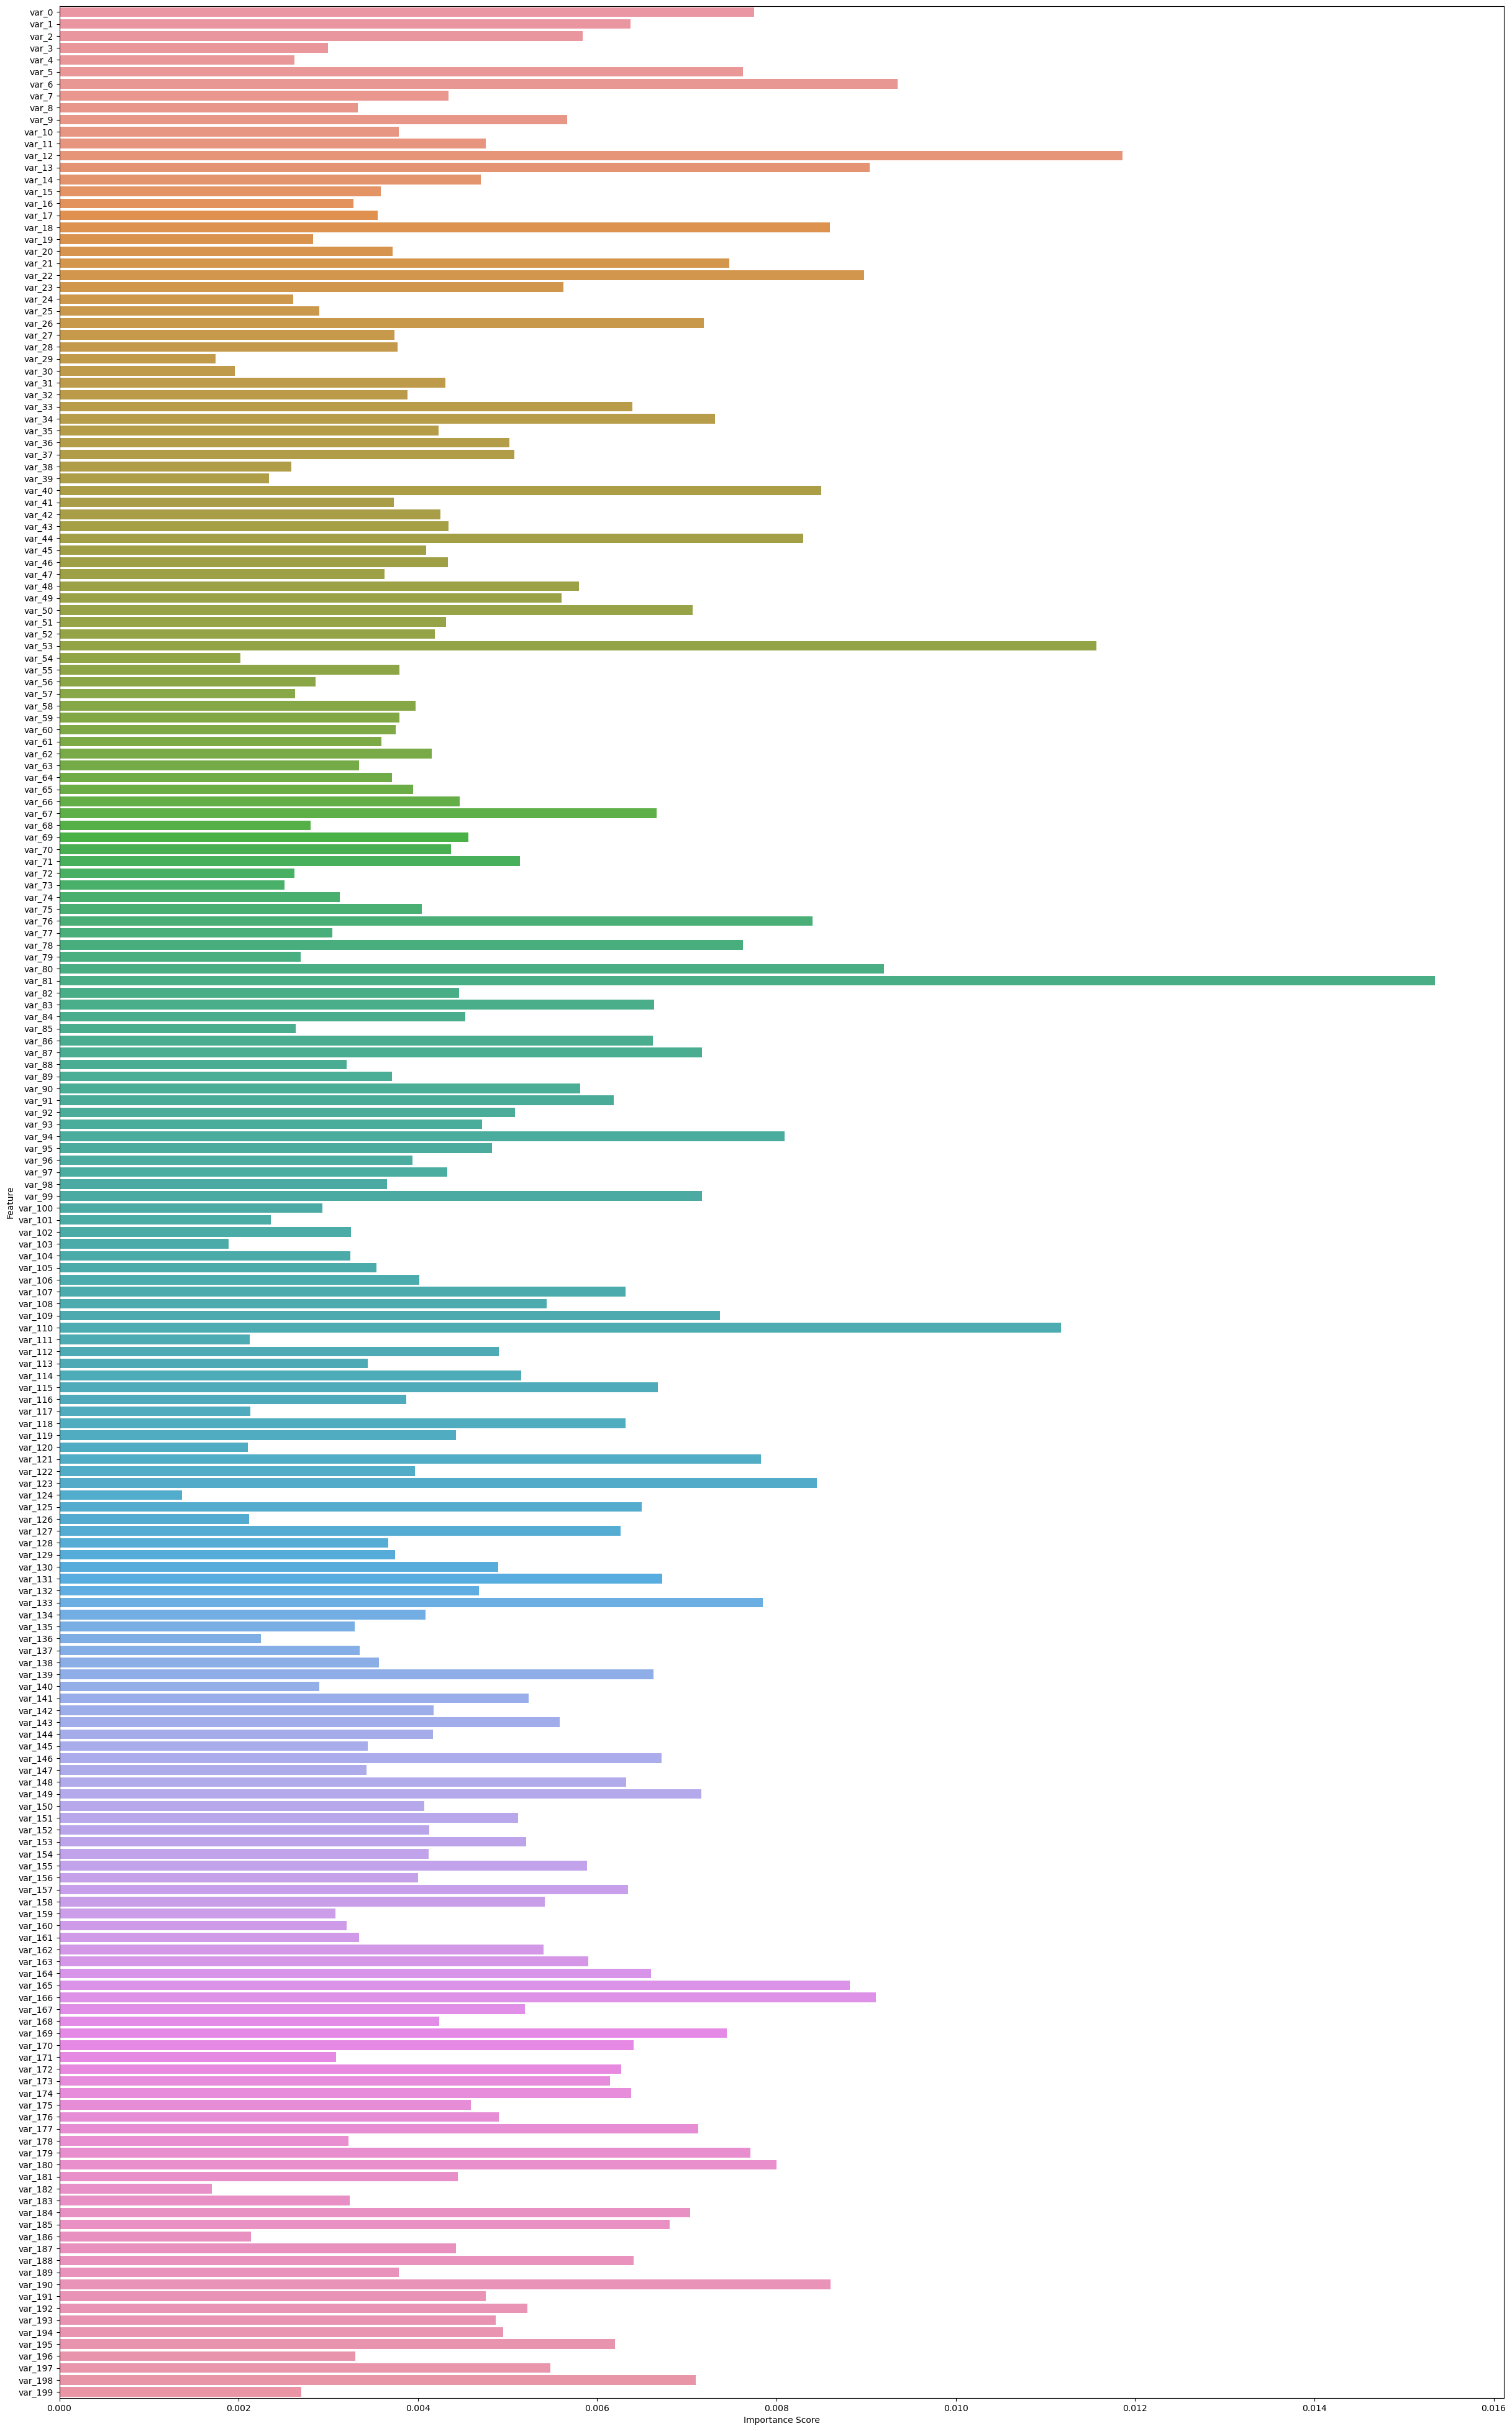

In [28]:
#feature Importances
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
conf_matrix

array([[35757,   146],
       [ 3718,   379]], dtype=int64)

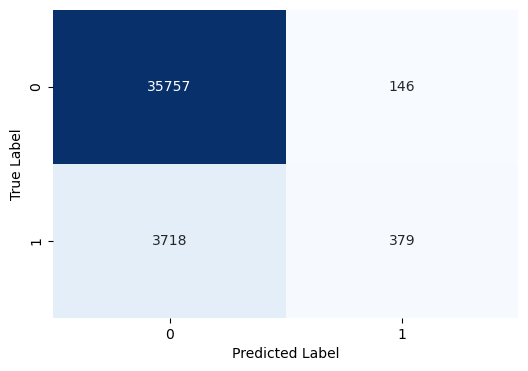

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# normalize data

In [4]:

scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X)

           var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0       0.427853  0.324824  0.568059  0.388041  0.550670  0.467321  0.454298   
1       0.557212  0.428639  0.681235  0.410417  0.628408  0.795072  0.536604   
2       0.411969  0.483777  0.578061  0.599690  0.474941  0.471329  0.753295   
3       0.535099  0.507140  0.396562  0.546993  0.647586  0.616822  0.572995   
4       0.473637  0.533434  0.624133  0.504796  0.621079  0.702836  0.589011   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.556579  0.572293  0.356529  0.268693  0.454064  0.886709  0.544817   
199996  0.226382  0.495472  0.846379  0.504570  0.278944  0.441637  0.579126   
199997  0.543277  0.393057  0.487100  0.429814  0.367884  0.545106  0.361976   
199998  0.467503  0.253090  0.666823  0.440957  0.641783  0.664399  0.606616   
199999  0.525846  0.367145  0.580254  0.610273  0.559035  0.660683  0.481378   

           var_7     var_8     var_9  .

# PCA

In [5]:
print(f"Before PCA: {X.shape}")

variance_threshold = 0.5

pca = PCA(n_components=variance_threshold)
X = pca.fit_transform(X)
print(f"After PCA: {X.shape}")

Before PCA: (200000, 200)
After PCA: (200000, 87)


# KNN

## find best k

In [ ]:
param_grid = {'n_neighbors': range(1, 21)}  # Testing k from 1 to 20

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,
                           scoring='precision', n_jobs=-1)

grid_search.fit(X, y)
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k: {best_k}")
print(f"Best Precision Score: {grid_search.best_score_}")


## use best k with KNN, find performance metrics

In [ ]:

knn = KNeighborsClassifier(n_neighbors=best_k)

kfold = KFold(n_splits=5, shuffle=True, random_state=2)
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

# MLP

In [ ]:
for hidden_layer_sizes in [
    (1000, 1000, 1000, 1000, 1000),
]:
    for activation in ["relu", "tanh"]:
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            max_iter=1000,
            solver="adam",
        )
        kfold = KFold(n_splits=5, shuffle=True, random_state=2)
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            mlp.fit(X_train, y_train)

            y_pred = mlp.predict(X_test)

            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Output the results
        print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
        print(f"Activation Function: {activation}")
        print(f"Precision: {np.mean(precision_scores):.4f}")
        print(f"Recall: {np.mean(recall_scores):.4f}")
        print(f"F1 Score: {np.mean(f1_scores):.4f}")


## Decision Tree

In [14]:
criterions = ["gini", "entropy", "log_loss"]
for criterion in criterions:
    decision_tree_clf = sklearn.tree.DecisionTreeClassifier(criterion=criterion, random_state=2, max_depth=25) 
    kfold = KFold(n_splits=5, shuffle=True, random_state=2)
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        decision_tree_clf.fit(X_train, y_train)

        y_pred = decision_tree_clf.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    print(f"Criterion: {criterion}")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")

Criterion: gini
Precision: 0.2691
Recall: 0.2112
F1 Score: 0.2366
Criterion: entropy
Precision: 0.2189
Recall: 0.2274
F1 Score: 0.2231
Criterion: log_loss
Precision: 0.2189
Recall: 0.2274
F1 Score: 0.2231
